<a href="https://colab.research.google.com/github/MartinaJoergensen/FirstCodes/blob/master/UZH/tutorials/Tutorial1_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Muliclass classifier on IRIS dataset

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import label_binarize

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

In [3]:
# One-hot encode the labels: use (1,0,0), (0,1,0), (0,0,1) 3 types of flowers,
y = to_categorical(y)

In [4]:
# Split data into training (60%), test (20%), and validation (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [5]:
# Check the shapes of the datasets
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Validation set shape: X_val={X_val.shape}, y_val={y_val.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(90, 4), y_train=(90, 3)
Validation set shape: X_val=(30, 4), y_val=(30, 3)
Test set shape: X_test=(30, 4), y_test=(30, 3)


In [6]:
#remove not needed datasets to reduce memory consumption
del X_temp, y_temp, X, y

In [7]:
# Define the neural network model
model = Sequential()

In [8]:
# Add layers
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer, generalisation sigmoid to more than one classes, output 0, and 1

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.3620 - loss: 1.3503 - val_accuracy: 0.3333 - val_loss: 1.3569
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3620 - loss: 1.2708 - val_accuracy: 0.3333 - val_loss: 1.2962
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3737 - loss: 1.2386 - val_accuracy: 0.3333 - val_loss: 1.2424
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3268 - loss: 1.2216 - val_accuracy: 0.3333 - val_loss: 1.1943
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3229 - loss: 1.1845 - val_accuracy: 0.3333 - val_loss: 1.1527
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3385 - loss: 1.1406 - val_accuracy: 0.3333 - val_loss: 1.1166
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3268 - loss: 1.1133 - val_accuracy: 0.3333 - val_loss: 1.0830
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3581 - loss: 1.0744 - val_accuracy: 0.3000 - val_loss

In [11]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 0.2585
Test Loss: 0.2585
Test Accuracy: 1.0000


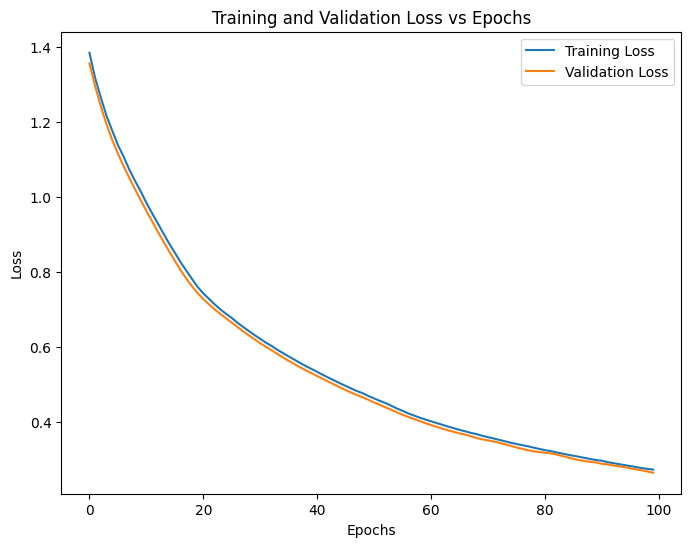

In [12]:
# Plot training & validation loss vs epochs
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#a good training but not done as there is a slope at the end

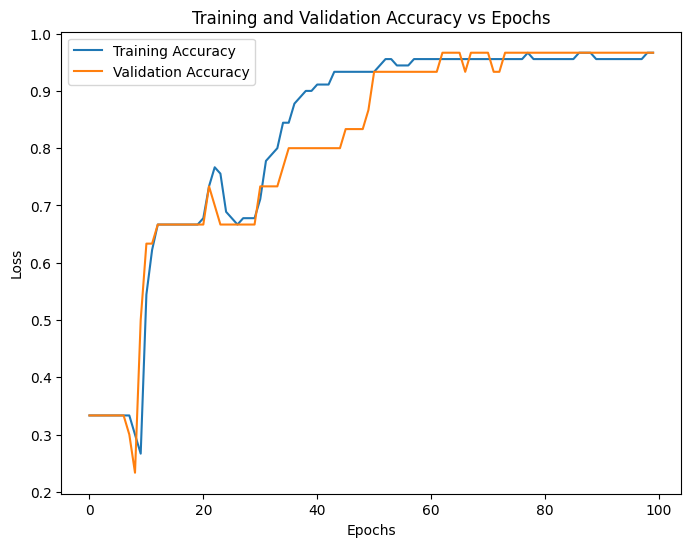

In [13]:
# Plot training & validation loss vs epochs
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.2585
Test Loss: 0.2585
Test Accuracy: 1.0000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


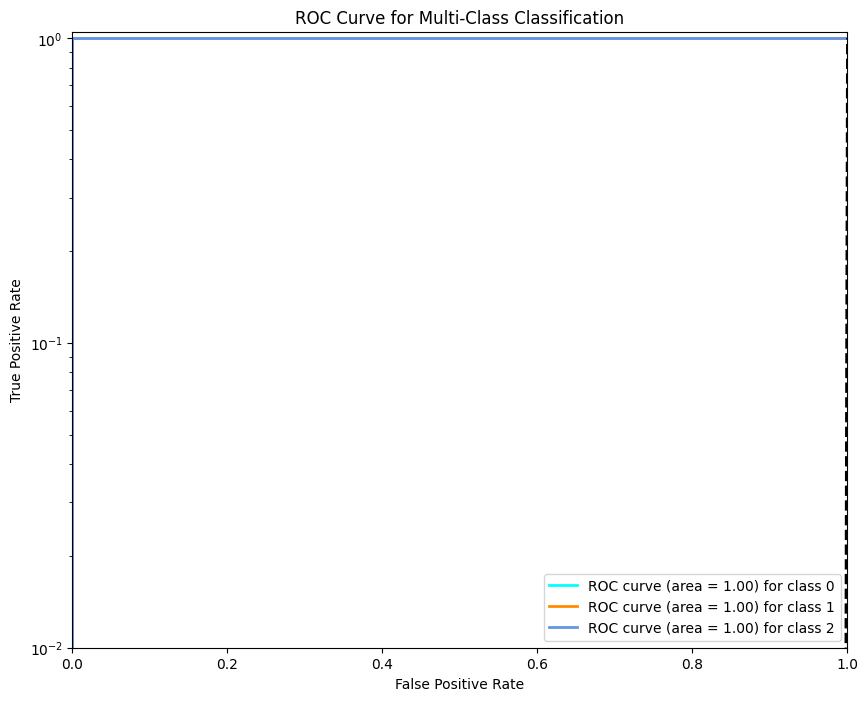

In [15]:
# ROC curve for the test dataset (One-vs-Rest)
n_classes = y_test.shape[1]

# Predict probabilities on the test set
y_score = model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
plt.yscale("log")
colors = ['aqua', 'darkorange', 'cornflowerblue']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


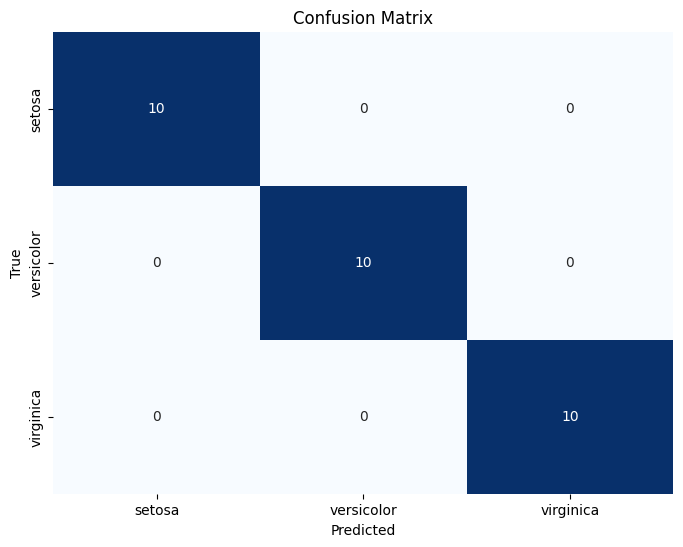

In [16]:
# Confusion matrix for the test dataset
y_pred = np.argmax(model.predict(X_test), axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Binary classifier on TITANIC dataset

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Load Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_data = pd.read_csv(url)

In [ ]:
# Display the first few rows of the dataset
titanic_data.head()

In [ ]:
# some standard processing
# Fill missing values in 'Age' with the median age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the mode (most frequent value)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Drop rows where 'Fare' is missing (if any)
titanic_data.dropna(subset=['Fare'], inplace=True)

# Drop unnecessary columns (PassengerId, Name, Ticket, Cabin)
titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# Convert categorical features 'Sex' and 'Embarked' to numeric using LabelEncoder
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])


In [ ]:
# Define features (X) and target (y)
X = titanic_data.drop(columns=['Survived'])
y = titanic_data['Survived']

In [ ]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split the dataset into training (60%), test (20%), and validation (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
#remove not needed datasets to reduce memory consumption
del X_temp, y_temp, X, y

In [ ]:
# Check the shapes of the datasets
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Validation set shape: X_val={X_val.shape}, y_val={y_val.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

In [ ]:
# Define the neural network model


In [ ]:
# Add layers


In [ ]:
# Compile the model


In [ ]:
# Train the model


In [ ]:
# Evaluate the model on the test set


In [ ]:
# Plot training & validation accuracy vs epochs

# Plot training & validation loss vs epochs


In [ ]:
# Generate predictions for the test set


In [ ]:
# Plot ROC Curve


In [ ]:
# Compute and plot confusion matrix
